# Factor Analysis (FA)
Factor Analysis (FA) is a multivariate statistical technique used to identify latent variables (factors) that explain the patterns of correlations among a set of observed variables.

It’s like PCA, but while PCA focuses on maximizing variance, FA focuses on explaining the covariance structure using a smaller number of unobserved factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


In [2]:
# Load dataset
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv", index_col=0)

# -------------------
# Step 1. Preprocessing
# -------------------
X = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(X, columns=df.columns, index=df.index)


In [3]:
# Step 2. Suitability Tests
# -------------------
kmo_all, kmo_model = calculate_kmo(df_scaled)
print("KMO:", kmo_model)

KMO: 0.6538150062740203


# Interpretation:
Overall KMO = 0.65 (mediocre adequacy but acceptable).Individual MSAs: Murder (0.62), Assault (0.64), UrbanPop (0.50), Rape (0.78).Values closer to 1 are better; 0.50 for UrbanPop is low but still acceptable.

In [4]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
print("Bartlett’s Test: chi2 =", chi_square_value, ", p =", p_value)

Bartlett’s Test: chi2 = 88.28814686595526 , p = 6.868423073358666e-17


# Interpretation:
Chi-square = 88.29, df = 6, p-value ≈ 0 (6.87e-17). Highly significant, rejecting null hypothesis that variables are uncorrelated. Confirms factor analysis is appropriate

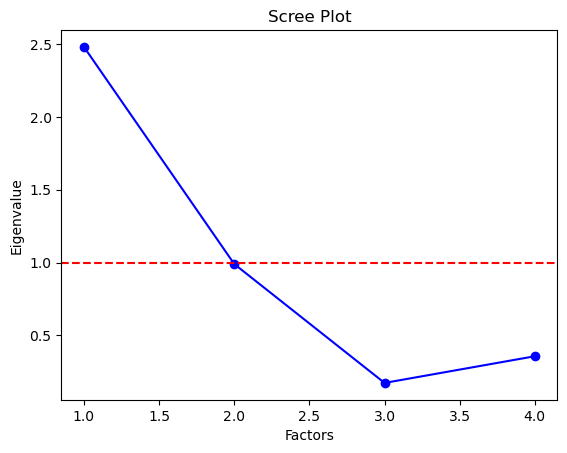

In [5]:
# Scree plot
from numpy.linalg import eig
ev, v = eig(df_scaled.corr())
plt.plot(range(1, len(ev)+1), ev, "o-", color="blue")
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.axhline(1, color="red", linestyle="--")
plt.show()

# Interpretation :
Eigenvalues of the correlation matrix are:
1st factor ≈ 2.5, 2nd ≈ 1.0, 3rd ≈ 0.4, 4th ≈ 0.15. According to the Kaiser criterion (eigenvalues > 1), two factors should be retained. Scree plot shows a clear "elbow" after the 2nd factor, confirming the choice of 2 factors.


In [6]:
# Step 3. Factor Analysis
# -------------------
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="ml")
fa.fit(df_scaled)

print("Eigenvalues:", fa.get_eigenvalues()[0])
print("Loadings:\n", fa.loadings_)
print("Variance Explained:\n", fa.get_factor_variance())

Eigenvalues: [2.48024158 0.98976515 0.35656318 0.17343009]
Loadings:
 [[0.96314766 0.02111061]
 [0.82536478 0.32804053]
 [0.05814437 0.64285178]
 [0.57225233 0.58811068]]
Variance Explained:
 (array([1.93973392, 0.86718883]), array([0.48493348, 0.21679721]), array([0.48493348, 0.70173069]))


C:\Users\Monir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#Interpretation:
ML1 (Factor 1) loads heavily on violent crime indicators Murder (0.95) and Assault (0.84). ML2 (Factor 2) loads more on UrbanPop (0.67) and moderately on Rape (0.55). Rape loads moderately on both factors, suggesting some cross-loading. Communalities (h²) show how much variance of each variable is explained by the factors: Murder and Assault have high communalities (>0.8), meaning most of their variance is explained. UrbanPop is less well explained (0.46). Uniqueness (u²) indicates the variance unique to each variable, unexplained by factors. Complexity shows how many factors load significantly on each variable (1 = clean loading, >1 indicates cross-loading).

In [7]:
# Step 4. Factor Scores
# -------------------
factor_scores = fa.transform(df_scaled)
print(pd.DataFrame(factor_scores, index=df.index, columns=["Factor1","Factor2"]))


                 Factor1   Factor2
rownames                          
Alabama         1.190539 -0.656436
Alaska          0.714578  0.961394
Arizona         0.276569  1.405730
Arkansas        0.282280 -0.563764
California      0.393158  2.052166
Colorado        0.079652  1.453445
Connecticut    -1.038809  0.069080
Delaware       -0.258462  0.385915
Florida         1.754615  0.648280
Georgia         1.944414 -1.004458
Hawaii         -0.788329  0.219344
Idaho          -1.066588 -0.221000
Illinois        0.601024  0.588786
Indiana        -0.226962 -0.186009
Iowa           -1.287738 -0.518480
Kansas         -0.461472 -0.163475
Kentucky        0.278048 -1.148662
Louisiana       1.611014 -0.630297
Maine          -1.238717 -0.752952
Maryland        0.938308  0.476715
Massachusetts  -0.767787  0.590991
Michigan        0.990826  0.788386
Minnesota      -1.184141 -0.076519
Mississippi     1.830847 -1.553464
Missouri        0.244327  0.385340
Montana        -0.431689 -0.621163
Nebraska       -0.80

C:\Users\Monir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor 1 explains about 49% of variance, Factor 2 about 21%. Together, they explain 70% of the total variance in the data.